<a href="https://colab.research.google.com/github/egioia92/Machine-Learning/blob/main/Assignment_Binary_Logistic_Regression_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment_Binary Logistic Regression using Python

The Data for a Study of Risk Factors Associated with Low Infant Birth Weight. Data were collected at Baystate Medical Center, Springfield, Massachusetts.

Description of variables -

LOW – Low Birth Weight (0 means Not low and 1 means low)

AGE- Age of the Mother in Years

LWT- Weight in Pounds at the Last Menstrual Period

RACE- Race (1 = White, 2 = Black, 3 = Other)

SMOKE- Smoking Status During Pregnancy (1 = Yes, 0 = No)

PTL- History of Premature Labor (0 = None, 1 = One, etc.)

HT- History of Hypertension (1 = Yes, 0 = No)

UI- Presence of Uterine Irritability (1 = Yes, 0 = No)

FTV- Number of Physician Visits During the First Trimester (0 = None, 1 = One, 2 = Two, etc.)



Consider LOW as dependent variable and remaining variables listed above as independent variables.

Consideration on the data:

1. LOW is the dependend variable
2. There are some independent variables that are categorical
  *   RACE
  *   SMOKE
  *   PTL
  *   HT
  *   UI
  *   FTV





# Question 1: Import BIRTH WEIGHT data

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [82]:
# Read data
data = pd.read_csv('/content/BIRTH WEIGHT_csv.csv')

In [83]:
# Show the data
data.head()

,SR NO,ID,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV
0,1,85,0,19,182,2,0,0,0,0,0
1,2,86,0,33,155,3,0,0,0,0,3
2,3,87,0,20,105,1,1,0,0,0,1
3,4,88,0,21,108,1,1,0,0,1,2
4,5,89,0,18,107,1,1,0,0,1,0


In [84]:
# Remove SR NO and ID columns from the data
data = data.drop(columns=['SR NO', 'ID'])

data.head()

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV
0,0,19,182,2,0,0,0,0,0
1,0,33,155,3,0,0,0,0,3
2,0,20,105,1,1,0,0,0,1
3,0,21,108,1,1,0,0,1,2
4,0,18,107,1,1,0,0,1,0


In [85]:
# Structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   LOW     189 non-null    int64
 1   AGE     189 non-null    int64
 2   LWT     189 non-null    int64
 3   RACE    189 non-null    int64
 4   SMOKE   189 non-null    int64
 5   PTL     189 non-null    int64
 6   HT      189 non-null    int64
 7   UI      189 non-null    int64
 8   FTV     189 non-null    int64
dtypes: int64(9)
memory usage: 13.4 KB


In [86]:
# Convert categorical variables as factor
categorical_columns = ['RACE', 'SMOKE', 'PTL', 'HT', 'UI', 'FTV']

for col in categorical_columns:
    data[col] = data[col].astype('category')

In [87]:
# Structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   LOW     189 non-null    int64   
 1   AGE     189 non-null    int64   
 2   LWT     189 non-null    int64   
 3   RACE    189 non-null    category
 4   SMOKE   189 non-null    category
 5   PTL     189 non-null    category
 6   HT      189 non-null    category
 7   UI      189 non-null    category
 8   FTV     189 non-null    category
dtypes: category(6), int64(3)
memory usage: 6.6 KB


In [88]:
# Count of missing values (NAs) in each column of the dataset data
data.isna().sum()

LOW      0
AGE      0
LWT      0
RACE     0
SMOKE    0
PTL      0
HT       0
UI       0
FTV      0
dtype: int64

In [89]:
#LOW is the dependent variable, let's see its distribution
table_counts = pd.crosstab(index=data['LOW'], columns="counts")
table_counts

col_0,counts
LOW,
0,130
1,59


Obeservation: one out of 3 women gave birth to a low weight infant

# Question 2 : Cross tabulate dependent variable with each independent variable

In [90]:
# Use cross-tabulation for categorical variables

# Creating a smaller dataframe with the dependent variable LOW and all the categorical independend variables
categ_var_df = data[['LOW', 'RACE', 'SMOKE', 'PTL', 'HT', 'UI', 'FTV']]

# Cross tabulate the dependent variable with each independent variables
for col in categ_var_df.columns[1:]:
    # Cross-tabulation
    crosstab = pd.crosstab(categ_var_df[col], categ_var_df['LOW'])

    # Calculate row totals
    crosstab['row_totals'] = crosstab[0] + crosstab[1]

    # Calculate the LOW RATE percentage
    crosstab['LOW RATE'] = (crosstab[1] / crosstab['row_totals'] ) * 100

    # Display the result
    print(crosstab)
    print("\n")

LOW    0   1  row_totals   LOW RATE
RACE                               
1     73  23          96  23.958333
2     15  11          26  42.307692
3     42  25          67  37.313433


LOW     0   1  row_totals   LOW RATE
SMOKE                               
0      86  29         115  25.217391
1      44  30          74  40.540541


LOW    0   1  row_totals   LOW RATE
PTL                                
0    118  41         159  25.786164
1      8  16          24  66.666667
2      3   2           5  40.000000
3      1   0           1   0.000000


LOW    0   1  row_totals   LOW RATE
HT                                 
0    125  52         177  29.378531
1      5   7          12  58.333333


LOW    0   1  row_totals   LOW RATE
UI                                 
0    117  45         162  27.777778
1     13  14          27  51.851852


LOW   0   1  row_totals   LOW RATE
FTV                               
0    64  36         100  36.000000
1    36  11          47  23.404255
2    23   7       

Observation:
#### LOW vs RACE
About the over all distribution we can see that out of 189 observations:
* 130 are not low birth weight (69%)
* 59 are low birth weight (31%)
* 96 mothers were white (51%)
* 26 mothers were black (14%)
* 67 mother others (35%)

The table shows a RACE imbalance, with more white (96) than black (26) and others(67), however the Low Infant Birth Weight rate is slightly higher among black and others(42%% and 37% vs 24%)

#### LOW vs SMOKE
About the over all distribution we can see that out of 189 observations:
* 130 are not low birth weight (69%)
* 59 are low birth weight (31%)
* 115 mothers did not smoke during pregnancy (61%)
* 74 mothers did smoke during pregnancy (39%)

The proportion of low birth weight infants is higher among mothers who smoked during pregnancy (40.5%) compared to those who did not smoke (25%). This suggests a potential association between smoking during pregnancy and increased risk of low birth weight.

The Chi-Square Contribution measures the impact of each cell on the overall Chi-square statistic. We can see that the higher contribution is given by the cell SMOKE =1 and LOW =1 suggesting that there is an association between smoking during pregnancy and the likelihood of low birth weight in infants.

#### LOW vs PTL
The table shows a PTL imbalance, with majority of the cases with no history of premature labor. However we can see that Low Infant Birth Weight rate is higher among women with a history of premature labors

#### LOW vs HT
There is a strong imbalance in the dataset with only 12 case having history of hypertension over 189 cases. However we can see that Low Infant Birth Weight rate is higher among women with a history of hypertension

#### LOW vs UI
There is a strong imbalance in the dataset with only 27 case having Presence of Uterine Irritability over 189 cases. However we can see that Low Infant Birth Weight rate is higher among women with a Presence of Uterine Irritability (52%% vs 28%)

#### LOW vs FVT
Several categories, with mixed results. At first sight it seems like the Number of Physician Visits During the First Trimester helps decreasing Low Infant Birth Weight rate. However results are mixed and do not help much.

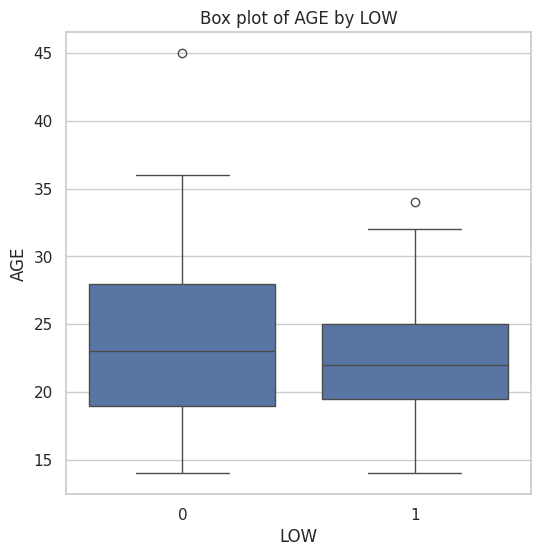

In [91]:
# Use box plots for numerical variables

sns.set(style="whitegrid")

# Create a boxplot using Seaborn
plt.figure(figsize=(6, 6))
sns.boxplot(x='LOW', y='AGE', data=data)
plt.title('Box plot of AGE by LOW')
plt.xlabel('LOW')
plt.ylabel('AGE')
plt.show()

Observation:

Women who had babies with low birth weight (LOW = 1) tend to be slightly younger on average compared to those who did not (LOW = 0). However, the difference in median age between the two groups is not large.

Variability:

The larger IQR for LOW = 0 indicates more variability in age among women who did not have low birth weight babies. The narrower IQR for LOW = 1 indicates that age is more consistent among women who had low birth weight babies.

Outliers:

The presence of outliers in both groups suggests that while the general trend holds, there are individual cases that deviate significantly from the median values.

Conclusion:

The boxplot shows that there is a slight tendency for women with low birth weight babies to be younger, but the difference is not substantial. Variability in age is greater among women who did not have low birth weight babies.

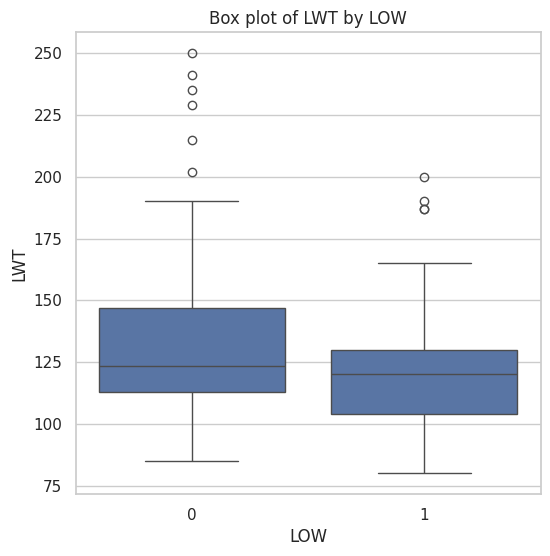

In [92]:
# Use box plots for numerical variables

sns.set(style="whitegrid")

# Create a boxplot using Seaborn
plt.figure(figsize=(6, 6))
sns.boxplot(x='LOW', y='LWT', data=data)
plt.title('Box plot of LWT by LOW')
plt.xlabel('LOW')
plt.ylabel('LWT')
plt.show()

Observation:

Women who had babies with low birth weight (LOW = 1) tend to have a lower median LWT compared to those who did not (LOW = 0). This suggests that a higher weight at the last menstrual period may be associated with a lower likelihood of having a low birth weight baby.

Variability:

The larger IQR for LOW = 0 indicates more variability in LWT among women who did not have low birth weight babies. The narrower IQR for LOW = 1 indicates that LWT is more consistent among women who had low birth weight babies.

Outliers:

The presence of outliers in both groups suggests that while the general trend holds, there are individual cases that deviate significantly from the median values.

# Question 3: Develop a model to predict if birth weight is low or not using the given variables

In [93]:
data.head()

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV
0,0,19,182,2,0,0,0,0,0
1,0,33,155,3,0,0,0,0,3
2,0,20,105,1,1,0,0,0,1
3,0,21,108,1,1,0,0,1,2
4,0,18,107,1,1,0,0,1,0


In [94]:
#Binary Logistic Regression using smf function

# Define the formula
formula = 'LOW ~ AGE + LWT + RACE + SMOKE + PTL + HT + UI + FTV'

# Fit the logistic regression model
logistic_model = smf.logit(formula, data=data).fit()

# Print the model summary
print(logistic_model.summary())

         Current function value: 0.497814
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                    LOW   No. Observations:                  189
Model:                          Logit   Df Residuals:                      173
Method:                           MLE   Df Model:                           15
Date:                Tue, 25 Jun 2024   Pseudo R-squ.:                  0.1981
Time:                        10:13:38   Log-Likelihood:                -94.087
converged:                      False   LL-Null:                       -117.34
Covariance Type:            nonrobust   LLR p-value:                 4.429e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8488      1.301      0.652      0.514      -1.701       3.399
RACE[T.2]      1.1351      0.552      2.057      0.040       0.05

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Interpretation:

AGE:

* Estimate: -0.0392
* Not statistically significant (p-value = 0.32200)
* A one year increase in age is associated with a decrease in the odds of low birth weight. However the effect is not significant.

LWT:

* Estimate: -0.0149
* Statistically significant (p-value = 0.047)
* A one pound increase in LWT is associated with a decrease in the odds of low birth weight.

RACE2:

* Estimate: 1.135
* Statistically significant (p-value = 0.040)
* Being black increases the odds of low birth weight compared to the reference category.

RACE3:

* Estimate: 0.6655
* Not statistically significant (p-value = 0.164)
* Being not white or not black increases the odds of low birth weight compared to the reference category, but this effect is not significant.

SMOKE1:

* Estimate: 0.6981
* Not statistically significant (p-value = 0.113)
* Smoking during pregnancy increases the odds of low birth weight, though the effect is not significant.

PTL1:

* Estimate: 1.856
* Statistically significant (p-value = 0.001)
* Having a history of premature labor significantly increases the odds of low birth weight.

PTL2:

* Estimate: 0.4758
* Not statistically significant (p-value = 0.637)
* Additional history of premature labor does not significantly affect the odds of low birth weight.

PTL3:

* Estimate: -25.15
* Not statistically significant (p-value = 1.000)
* This appears to be an outlier/erroneous value.

HT1:

* Estimate: 1.7893
* Statistically significant (p-value = 0.017 )
* A history of hypertension increases the odds of low birth weight.

UI1:

* Estimate: 0.8683
* Marginally Statistically significant (p-value = 0.075)
* Uterine irritability increases the odds of low birth weight, with marginal significance.

FTV:

* Several categories, with mixed results.
* Not statistically significant, indicating that the number of physician visits does not significantly affect the odds of low birth weight.


Note:

While our model includes several variables that are statistically insignificant, it is crucial to emphasize that in the healthcare domain, caution should be exercised when considering variable removal. In healthcare, even seemingly insignificant variables may hold clinical relevance or contribute to a comprehensive understanding of patient outcomes. Therefore, retaining these variables in the model allows for a more holistic analysis that aligns with the complex and multifaceted nature of healthcare data.

In [96]:
# Create a DataFrame to store VIF results
vif_data = pd.DataFrame()
vif_data["Feature"] = logistic_model.model.exog_names[1:]  # Exclude intercept
vif_data["VIF"] = [variance_inflation_factor(logistic_model.model.exog, i) for i in range(1, logistic_model.model.exog.shape[1])]

# Print the VIF DataFrame
print(vif_data)

       Feature       VIF
0    RACE[T.2]  1.214207
1    RACE[T.3]  1.538592
2   SMOKE[T.1]  1.372082
3     PTL[T.1]  1.186859
4     PTL[T.2]  1.051199
5     PTL[T.3]  1.062971
6      HT[T.1]  1.118500
7      UI[T.1]  1.123040
8     FTV[T.1]  1.297840
9     FTV[T.2]  1.184968
10    FTV[T.3]  1.060785
11    FTV[T.4]  1.083525
12    FTV[T.6]  1.191862
13         AGE  1.186577
14         LWT  1.449523


It is observed that no variable has high vif. Hence the problem of multicollinearity does not exist.

# Question 4 Generate three classification tables with cut-off values 0.4, 0.3 and 0.55

In [98]:
#Estimate predicted probabilities and add a column in the original data
data['predicted_prob'] = logistic_model.predict(data)
data.head()

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,predicted_prob
0,0,19,182,2,0,0,0,0,0,0.186409
1,0,33,155,3,0,0,0,0,3,0.270758
2,0,20,105,1,1,0,0,0,1,0.203063
3,0,21,108,1,1,0,0,1,2,0.471090
4,0,18,107,1,1,0,0,1,0,0.528726


In [100]:
#classification tables with cut-off values 0.4
data['estimated_low_0.4'] = pd.cut(data['predicted_prob'], bins=[0, 0.4, 1], labels=[0, 1], include_lowest=True)
data.head()

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,predicted_prob,estimated_low_0.4
0,0,19,182,2,0,0,0,0,0,0.186409,0
1,0,33,155,3,0,0,0,0,3,0.270758,0
2,0,20,105,1,1,0,0,0,1,0.203063,0
3,0,21,108,1,1,0,0,1,2,0.471090,1
4,0,18,107,1,1,0,0,1,0,0.528726,1


In [101]:
#classification tables with cut-off values 0.3
data['estimated_low_0.3'] = pd.cut(data['predicted_prob'], bins=[0, 0.3, 1], labels=[0, 1], include_lowest=True)
data.head()

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,predicted_prob,estimated_low_0.4,estimated_low_0.3
0,0,19,182,2,0,0,0,0,0,0.186409,0,0
1,0,33,155,3,0,0,0,0,3,0.270758,0,0
2,0,20,105,1,1,0,0,0,1,0.203063,0,0
3,0,21,108,1,1,0,0,1,2,0.471090,1,1
4,0,18,107,1,1,0,0,1,0,0.528726,1,1


In [102]:
#classification tables with cut-off values 0.55
data['estimated_low_0.55'] = pd.cut(data['predicted_prob'], bins=[0, 0.55, 1], labels=[0, 1], include_lowest=True)
data.head()

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,predicted_prob,estimated_low_0.4,estimated_low_0.3,estimated_low_0.55
0,0,19,182,2,0,0,0,0,0,0.186409,0,0,0
1,0,33,155,3,0,0,0,0,3,0.270758,0,0,0
2,0,20,105,1,1,0,0,0,1,0.203063,0,0,0
3,0,21,108,1,1,0,0,1,2,0.471090,1,1,0
4,0,18,107,1,1,0,0,1,0,0.528726,1,1,0


# Question 5 : Calculate sensitivity,specificity and misclassification rate for all three tables above. What is the recommended cut-off value?

In [106]:
# Calculate the confusion matrix for each cutoff value

#                    Predicted Negative (0)	Predicted Positive (1)
# Actual Negative (0)	        TN	                    FP
# Actual Positive (1)	        FN	                    TP

# Calculate sensitivity, specificity, and misclassification rate for each cutoff value
# Sensitivity = True positives (TP) / total number of positive cases true positives (TP) and false negatives (FN)
# Specificity = True Negative (TN) / total number of negative cases true negatives (FN) and false positives (FP)
# Misclassification = Total incorrect predictions (false positives FP and false negatives FN) / the total predictions

# Define cutoff column names
cutoff_col_names = ['estimated_low_0.4', 'estimated_low_0.3', 'estimated_low_0.55']

for column_name in cutoff_col_names:

    # Create confusion matrix
    cm = confusion_matrix(data['LOW'], data[column_name])

    # Calculate sensitivity, specificity, and misclassification rate
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])  # TP / (TP + FN)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # TN / (TN + FP)
    misclassification_rate = (cm[0, 1] + cm[1, 0]) / cm.sum()  # (FP + FN) / Total

    # Print confusion matrix and metrics
    print(f"Cutoff for {column_name}:")
    print("Confusion Matrix:")
    print(cm)
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"Misclassification rate: {misclassification_rate}")
    print()

Cutoff for estimated_low_0.4:
Confusion Matrix:
[[108  22]
 [ 26  33]]
Sensitivity: 0.559322033898305
Specificity: 0.8307692307692308
Misclassification rate: 0.25396825396825395

Cutoff for estimated_low_0.3:
Confusion Matrix:
[[96 34]
 [19 40]]
Sensitivity: 0.6779661016949152
Specificity: 0.7384615384615385
Misclassification rate: 0.2804232804232804

Cutoff for estimated_low_0.55:
Confusion Matrix:
[[120  10]
 [ 39  20]]
Sensitivity: 0.3389830508474576
Specificity: 0.9230769230769231
Misclassification rate: 0.25925925925925924



The recommended cut-off value among 0.3, 0.4 and 0.55 is 0.3 as it is the one that maximize the sum of Sensitivity and Specificity.

# Question 6 : Obtain ROC curve and report area under curve

AUC ROC: 0.7797913950456323


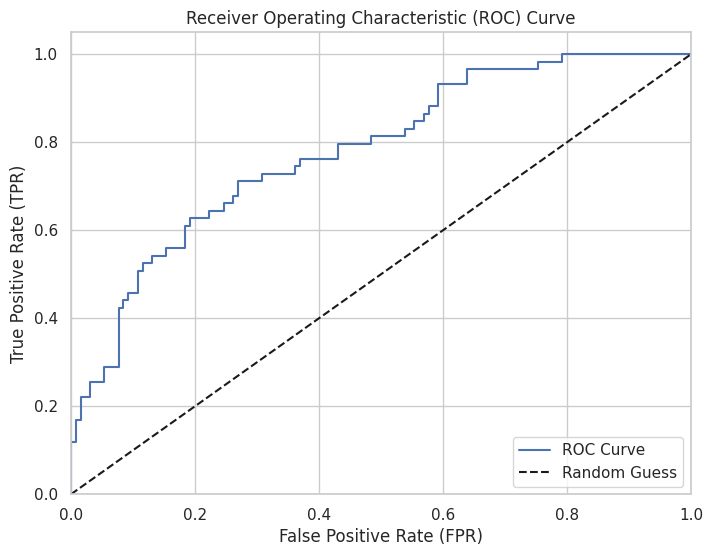

In [108]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(data['LOW'], data['predicted_prob'])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Calculate AUC ROC
auc_roc = roc_auc_score(data['LOW'], data['predicted_prob'])
print(f'AUC ROC: {auc_roc}')

# Show the plot
plt.show()

The model’s AUC of 78% indicates a relatively strong discriminative ability, implying good predictive performance

In [109]:
# Best Threshold

# Find the optimal threshold index that maximizes the difference between true positive rate (tpr) and false positive rate (fpr).
optimal_idx = np.argmax(tpr - fpr)

# Get the corresponding optimal threshold from the thresholds array.
optimal_threshold = round(thresholds[optimal_idx],3)

# Convert the optimal_threshold to a percentage string before printing
print(f'Best Threshold is : {optimal_threshold}')

Best Threshold is : 0.29


In [110]:
#Classification Report with best threshold

# Calculate predicted classes
data['predicted_class'] = (data['predicted_prob'] > optimal_threshold).astype(int)

# Create the classification report
report = classification_report(data['LOW'], data['predicted_class'])

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.85      0.73      0.79       130
           1       0.55      0.71      0.62        59

    accuracy                           0.72       189
   macro avg       0.70      0.72      0.70       189
weighted avg       0.75      0.72      0.73       189



The accuracy is approximately 72% indicating relatively good model performance.